# Análisis de Sentimientos en Twitter con BETO\n
Flujo completo: Recolección → Preprocesamiento → Análisis → Visualización

In [18]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # Agrega el directorio padre para importar 'scripts'
# Cargar variables de entorno desde .env
from dotenv import load_dotenv
load_dotenv()

import pandas as pd
from scripts.twitter_collector import TwitterCollector
from scripts.preprocessor import TwitterPreprocessor
from scripts.sentiment_analyzer import SentimentAnalyzer
import matplotlib.pyplot as plt

## 1. Recolección de datos

In [ ]:
import os
import pandas as pd

raw_tweets_path = "../data/raw_tweets.csv"

if not os.path.exists(raw_tweets_path):
    collector = TwitterCollector(bearer_token=os.getenv("TWITTER_BEARER_TOKEN"))
    # Recoger 100 tweets sobre trump en español (máximo permitido por llamada v2)
    tweets = collector.search_tweets(query="trump lang:es -is:retweet", max_results=100)
    tweets.to_csv(raw_tweets_path, index=False)
    print("Tweets descargados y guardados.")
else:
    print("El archivo de tweets ya existe. Cargando desde archivo.")
    tweets = pd.read_csv(raw_tweets_path)

Rate limit exceeded. Sleeping for 748 seconds.


KeyboardInterrupt: 

## 2. Preprocesamiento específico para Twitter

In [ ]:
preprocessor = TwitterPreprocessor()
df = pd.read_csv("../data/raw_tweets.csv")

# Filtrar solo tweets en español
df = df[df['lang'] == 'es']

# Aplicar transformaciones
df['cleaned_text'] = df['text'].apply(preprocessor.clean_tweet)
df['tokenized'] = df['cleaned_text'].apply(preprocessor.tokenize)

# Guardar datos procesados
df.to_csv("../data/processed_tweets.csv", index=False)

## 3. Análisis de Sentimientos con BETO

In [ ]:
analyzer = SentimentAnalyzer(model_name="finiteautomata/beto-sentiment-analysis")

# Predecir sentimientos
df = pd.read_csv("../data/processed_tweets.csv")
df['sentiment'] = df['cleaned_text'].apply(analyzer.predict_sentiment)

# Guardar resultados
df.to_csv("../data/analyzed_tweets.csv", index=False)

/Users/armandomoralescarmona/Documents/Proyects/MasterSchoolProjects/nlp/mexmiart06_act2/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## 4. Visualización de Resultados

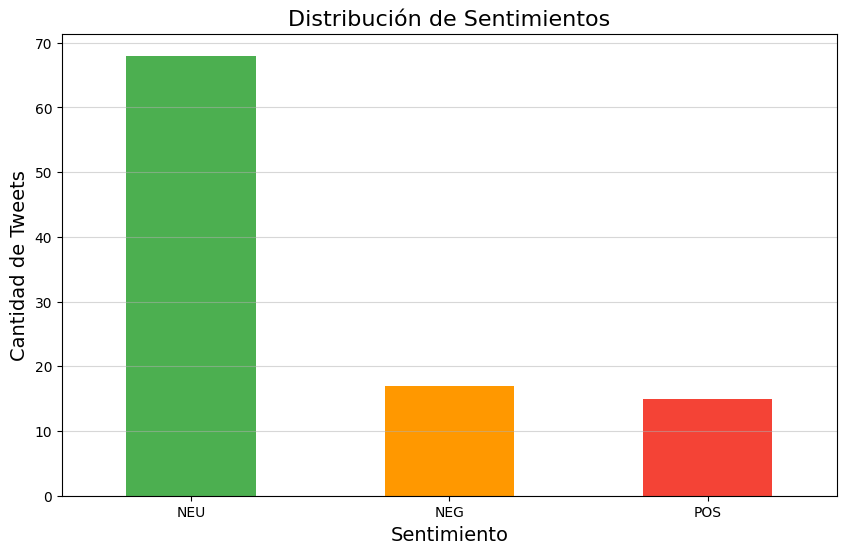

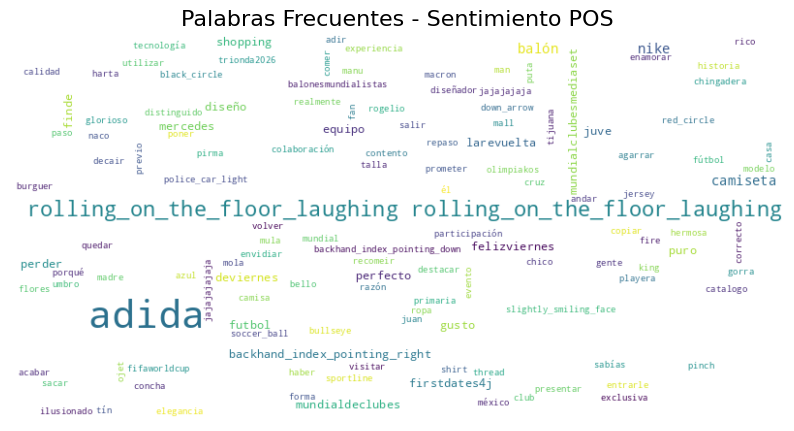

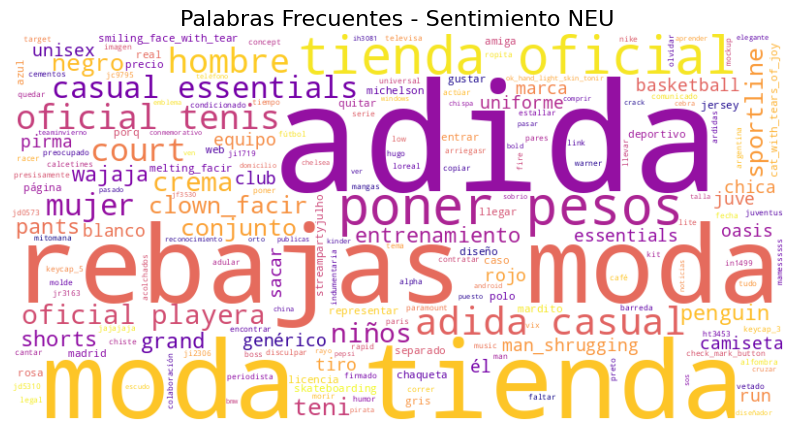

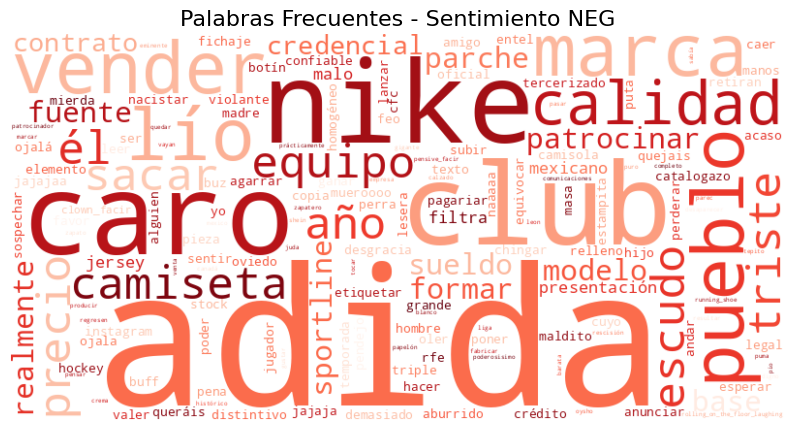

In [ ]:
def plot_sentiment_distribution(df):
    sentiment_counts = df['sentiment'].value_counts()
    plt.figure(figsize=(10, 6))
    sentiment_counts.plot(kind='bar', color=['#4CAF50', '#FF9800', '#F44336'])
    plt.title('Distribución de Sentimientos', fontsize=16)
    plt.xlabel('Sentimiento', fontsize=14)
    plt.ylabel('Cantidad de Tweets', fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

def plot_wordcloud_by_sentiment(df, sentiment):
    from wordcloud import WordCloud
    text = " ".join(df[df['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, 
                         background_color='white',
                         colormap='viridis' if sentiment == 'POS' else 'plasma' if sentiment == 'NEU' else 'Reds').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Palabras Frecuentes - Sentimiento {sentiment}', fontsize=16)
    plt.axis('off')
    plt.show()

# Distribución general
plot_sentiment_distribution(df)

# Nubes de palabras por sentimiento
for sentiment in ['POS', 'NEU', 'NEG']:
    plot_wordcloud_by_sentiment(df, sentiment)